In [172]:
import sqlite3
import pandas as pd

db = sqlite3.connect('books.db')
cursor = db.cursor()

# Create table
query = 'DROP TABLE IF EXISTS Books;'
cursor.execute(query)

query = '''CREATE TABLE IF NOT EXISTS Books (
    BookId INT NOT NULL,
    Title TEXT NOT NULL,
    Author TEXT,
    YearPublished TEXT,
    DateRead DATE,
    Rating INT
);
'''
cursor.execute(query)

# Add data
df = pd.read_csv('goodreads_library_export.csv')

# 'Date Read' is not always recorded, so use 'Date Added' if not present
def get_date(row):
    if row['Date Read'] == None or row['Date Read'] == '':
        return row['Date Added']
    else:
        return row['Date Read']

for index, row in df.iterrows():
    query = '''INSERT INTO Books (BookId, Title, Author, YearPublished, DateRead, Rating) VALUES(?, ?, ?, ?, ?, ?)'''
    cursor.execute(query, (row['Book Id'], row['Title'], row['Author'], row['Year Published'], get_date(row), row['My Rating']))

# Check we have the rows in the table
query = 'SELECT Title, Author FROM Books ORDER BY Author LIMIT 10'
cursor.execute(query)
all_rows = cursor.fetchall()

for row in all_rows:
    print(row[0] + ': ' + row[1])

db.commit()
db.close()

Challenger: A True Story of Heroism and Disaster on the Edge of Space: Adam Higginbotham
Aurora Rising (The Aurora Cycle, #1): Amie Kaufman
The Ship: Antonia Honeywell
A Fall of Moondust: Arthur C. Clarke
The Push: Ashley Audrain
The Time Traveler's Wife: Audrey Niffenegger
The Intelligence Illusion: a practical guide to the business risks of Generative AI: Baldur Bjarnason
Girl, Woman, Other: Bernardine Evaristo
Lessons in Chemistry: Bonnie Garmus
Blood in the Machine: The Origins of the Rebellion Against Big Tech: Brian Merchant


## Most read authors
Top 20 authors by number of books read

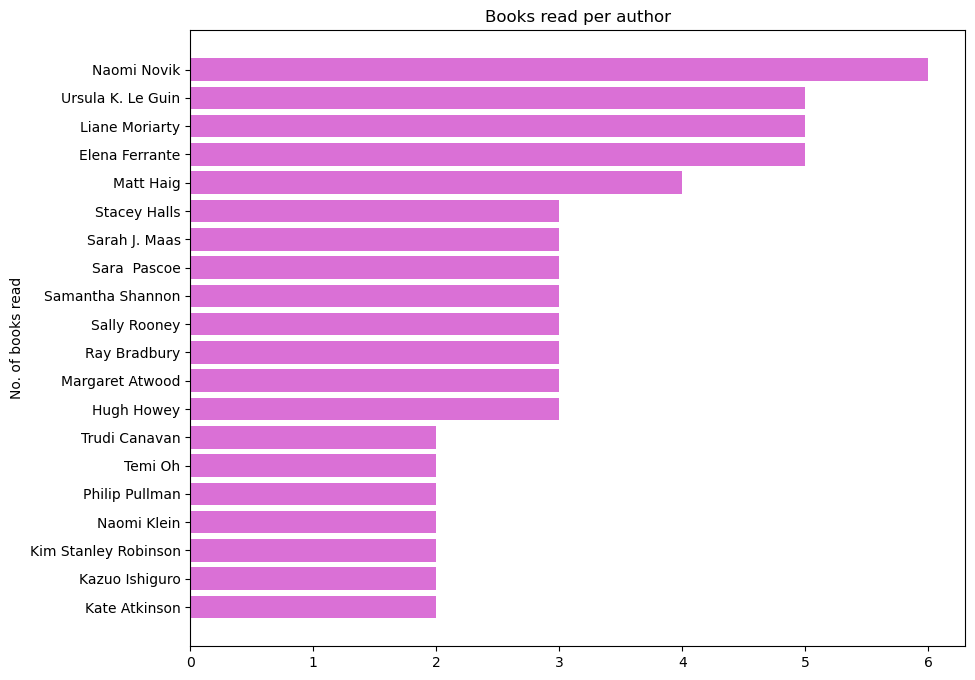

In [ ]:
import sqlite3
import matplotlib.pyplot as plt

db = sqlite3.connect("books.db")
cursor = db.cursor()

query = '''
    SELECT Author, COUNT(BookId) AS BooksRead FROM Books
    GROUP BY Author
    ORDER BY BooksRead DESC
    LIMIT 20
    '''
cursor.execute(query)
most_read_authors = cursor.fetchall()
db.close()

bar_locations = []
books_count = []
authors = []

for author, count in most_read_authors:
    index = most_read_authors.index((author, count))
    bar_locations.append(index)
    authors.append(author)
    books_count.append(count)

plt.figure(figsize=(10,8))
plt.barh(bar_locations, books_count, color='orchid', tick_label=authors)
plt.gca().invert_yaxis()
plt.ylabel('No. of books read')
plt.title('Books read per author')
    
plt.show()

## Number of books read by year

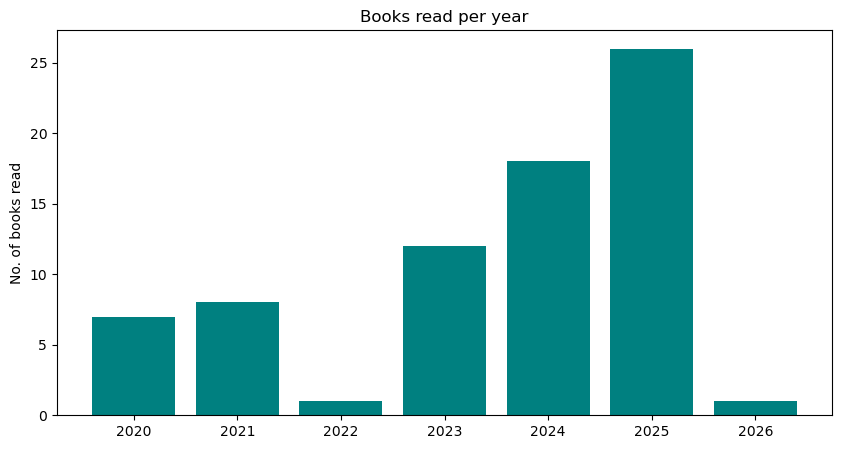

In [ ]:
import sqlite3
import matplotlib.pyplot as plt

db = sqlite3.connect('books.db')
cursor = db.cursor()

query = '''
    SELECT SUBSTRING(DateRead, 1, 4) AS DateYear, COUNT(*) AS BooksRead FROM Books
    GROUP BY DateYear
    HAVING DateRead!='None'
    ORDER BY DateYear
    '''
cursor.execute(query)
books_per_year = cursor.fetchall()
db.close()

bar_locations = []
books_count = []
years = []

for year, count in books_per_year:
    index = books_per_year.index((year, count))
    bar_locations.append(index)
    years.append(year)
    books_count.append(count)

plt.figure(figsize=(10,5))
plt.bar(bar_locations, books_count, color='teal', tick_label=years)
plt.ylabel('No. of books read')
plt.title('Books read per year')
    
plt.show()

## Top months for reading in 2025

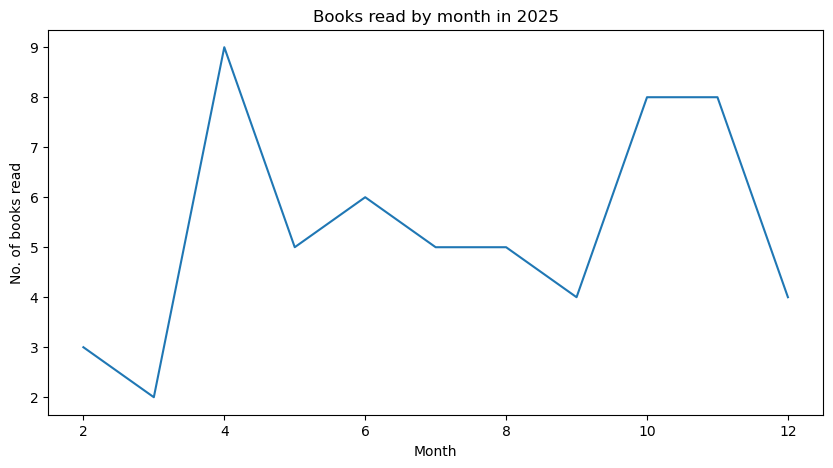

In [ ]:
import sqlite3
import matplotlib.pyplot as plt

db = sqlite3.connect('books.db')
cursor = db.cursor()

query = '''
    SELECT SUBSTRING(DateRead, 1, 4) AS DateYear, SUBSTRING(DateRead, 6, 2) AS DateMonth, COUNT(*) AS BooksRead FROM Books
    GROUP BY DateMonth
    HAVING DateYear='2025'
    ORDER BY DateMonth
    '''
cursor.execute(query)
books_read = cursor.fetchall()
db.close()

date = []
books_count = []

for year, month, count in books_read:
    index = books_read.index((year, month, count))
    date.append(int(month))
    books_count.append(count)

plt.figure(figsize=(10,5))
plt.plot(date, books_count)
plt.ylabel('No. of books read')
plt.xlabel('Month')
plt.title('Books read by month in 2025')
    
plt.show()

## Rating compared to year published

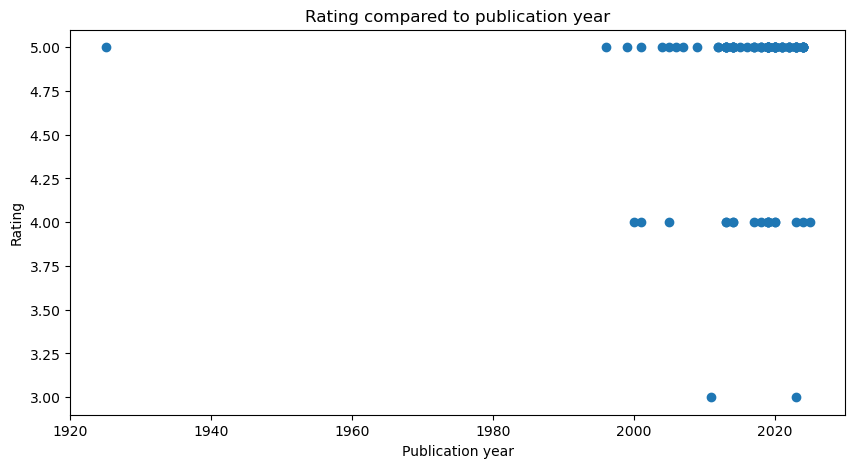

In [ ]:
import sqlite3
import matplotlib.pyplot as plt

db = sqlite3.connect('books.db')
cursor = db.cursor()

query = '''
    SELECT YearPublished, Rating, Title FROM Books
    WHERE Rating!='None'
    AND Rating!=0
    '''
cursor.execute(query)
books = cursor.fetchall()
db.close()

pub_years = []
book_ratings = []
titles = []

for year, rating, title in books:
    index = books.index((year, rating, title))
    pub_years.append(int(year))
    book_ratings.append(rating)

plt.figure(figsize=(10,5))
plt.scatter(pub_years, book_ratings)
plt.ylabel('Rating')
plt.xlabel('Publication year')
plt.title('Rating compared to publication year')
    
plt.show()